##Sarthak Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
#housing.head()

In [4]:
housing["CHAS"]

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [5]:
# housing["CHAS"].value_counts()

In [6]:
#housing.describe()

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#housing.hist(bins=50,figsize=(20,50))

## Train-Test Split

In [10]:
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
# train_set,test_set=split_train_test(housing,0.2)

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train_set:{len(train_set)}\n Rows in test_set: {len(test_set)}\n")

Rows in train_set:404
 Rows in test_set: 102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["CHAS"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LTSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.302188,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.666198,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.167000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LTSTAT   102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [16]:
strat_test_set["CHAS"].value_counts

<bound method IndexOpsMixin.value_counts of 342    0
379    0
223    0
219    1
48     0
      ..
88     0
466    0
52     0
121    0
218    1
Name: CHAS, Length: 102, dtype: int64>

In [17]:
# 95/7

In [18]:
housing=strat_train_set.copy()

## Looking for correlations

In [19]:
cor_matrix=housing.corr()

In [20]:
cor_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.678853
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LTSTAT    -0.740494
Name: MEDV, dtype: float64

In [21]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LTSTAT"]
#scatter_matrix(housing[attributes],figsize=(12,8))

## Trying out attribute combinations

In [22]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LTSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
cor_matrix=housing.corr()
cor_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.678853
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.529362
LTSTAT    -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

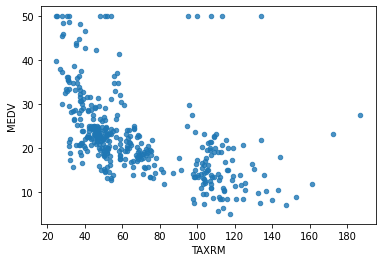

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
# to take care of missing attributes you have 3 options:
#     get rid of missing data points
#     get rid of whole attribute
#     set the miising value to (0,mean or median)

In [28]:
a=housing.dropna(subset=["RM"]) #option1
#housing original dataframe will remain unchanged

In [29]:
a.shape

(400, 13)

In [30]:
housing.drop("RM",axis=1) #option2
#housing original dataframe will remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LTSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [31]:
median=housing["RM"].median() #Compute midian for option 3
#housing original dataframe will remain unchanged
median

6.2175

In [32]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.describe() #Before we start filling missing values with impute

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LTSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284290,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715058,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)

## Feature-scaling

Primarily Two types of Feature Scaling Methods:
    1.Min-Max Scaling(Normalization)-(Value-min)/(Max-Min)
      Sk-learn provides a class min-max scaler for this
     2.Standardization-(Value-mean)/std
         Sklearn provides class Standard Scaler for this

## Sickit-Learning

Primarily 3 types of objects
1.Estimators-it estimates some parameter based on a dataset.Eg.imputer it has a fit method and tranform .fit method- fits the dataset and calculates internal parameters
2.Transformers-it takes input and returns output based on the learnings from fit.it also has a convienence function called fit_transform() which fits and then transforms
3.Predictors- linear regression model is an example of predictor fit and predict are two common functions it also gives scores() which will evaluate the

## Creating a pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("stdscaler",StandardScaler()),
])

In [37]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [38]:
# housing_num_tr.shape

## Selcting a desired model for Sarthak Real Estate

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [40]:
some_labels=housing_labels.iloc[:5]

In [41]:
some_data=housing.iloc[:5]
prepared_data=my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([22.63 , 25.499, 16.673, 23.307, 23.651])

In [43]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)

In [45]:
rmse

1.1823968190179472

In [46]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [47]:
rmse_scores

array([2.89303737, 2.81164892, 4.27528707, 2.60528901, 3.42016222,
       2.67050301, 4.55396366, 3.31378273, 3.34222739, 3.58233467])

In [48]:
def printscores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [49]:
printscores(rmse_scores)

Scores:  [2.89303737 2.81164892 4.27528707 2.60528901 3.42016222 2.67050301
 4.55396366 3.31378273 3.34222739 3.58233467]
Mean:  3.346823606386456
Standard Deviation:  0.6229611019667469


## Saving the model

In [50]:
from joblib import dump,load
dump(model,"Sarthak.joblib")

['Sarthak.joblib']

## Testing model on test data

In [54]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_prediction=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
print(final_prediction,list(y_test))

[24.668 11.523 25.669 21.765 18.5   15.131 20.356 14.632 31.862 42.254
 19.421 11.77  22.876 28.53  19.723 11.375 31.124 14.268 23.816 18.694
 19.981 17.95  18.181 21.954 18.201 31.624 16.509 32.598  9.201 33.071
 24.073 21.576 22.592 10.637 21.511 11.26  44.102 24.386 23.276 42.501
 23.974 30.916 20.472 21.411 19.105 33.21  44.016 20.303 20.433 21.908
 21.458 14.166 21.473 15.138 25.335 32.617 40.711 29.498 19.364 20.75
 46.098 10.262 19.166 24.695 14.786 33.037 20.523 18.232 19.215 34.139
 25.467 22.643 21.162 22.189 34.006 13.022 16.344 20.313 20.868 21.395
 22.295 20.909 14.092 21.797 20.816 21.203 14.537 21.604 21.394 22.902
 18.624 26.965  7.265 26.72  19.316 28.944 19.814 31.278 14.707 27.082
 21.72  20.319] 342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64


In [55]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24713807, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])